# Analysis of "train.csv" Dataset
### Josephine Nguyen

In [11]:
import pandas as pd
df = pd.read_csv('/Users/joeynguyen/Downloads/pydata-book-3rd-edition/DATA506/train.csv')

### Relationship Between Class and Death Rate
#### The majority of deaths occurred among 3rd class passengers, followed by 2nd and 1st class. There were also more passengers in 3rd class on the ship. Even after accounting for the number of passengers in each class, the survival rate was highest in 3rd class and lowest in 1st class. This suggests that class influenced a passenger's chance of survival.

#### Passengers In Each Class:
##### 3rd Class: 492
##### 2nd Class: 184
##### 1st Class: 217

#### Passengers Who Did Not Survive In Each Class:
##### 3rd Class: 270
##### 2nd Class: 90
##### 1st Class: 64

#### Death Rate In Each Class:
##### 3rd Class: 54.88%
##### 2nd Class: 48.91%
##### 1st Class: 29.49%


In [57]:
# Select data from at least 3 different columns including Pclass
# Create dataframe with three different columns: 'Pclass', 'Age', 'Survived'
pc = df[['Pclass', 'Age', 'Survived']]

# Filter datadrame to only include rows where 'Pclass' = 3
pc_3 = pc.loc[pc['Pclass'] == 3]

print('\n3rd Class Passengers Who Did Not Survive')
pc_3_dead = pc_3.loc[pc_3['Survived'] == 0].value_counts()
print(pc_3_dead)

# Filter datadrame to only include rows where 'Pclass' = 2
pc_2 = pc.loc[pc['Pclass'] == 2]

print('\n2nd Class Passengers Who Did Not Survive')
pc_2_dead = pc_2.loc[pc_2['Survived'] == 0].value_counts()
print(pc_2_dead)

# Filter datadrame to only include rows where 'Pclass' = 1
pc_1 = pc.loc[pc['Pclass'] == 1]

print('\n2nd Class Passengers Who Did Not Survive')
pc_1_dead = pc_1.loc[pc_1['Survived'] == 0].value_counts()
print(pc_1_dead)

# Number of passengers who did not survive in each class
print('\nPassengers Who Did Not Survive In Each Class:')
print(f"3rd Class: {pc_3_dead.sum()}")
print(f"2nd Class: {pc_2_dead.sum()}")
print(f"1st Class: {pc_1_dead.sum()}")

# Death rate in each class
# Get total passengers in each class using 'df.shape'
print('\nDeath Rate In Each Class:')
print(f"3rd Class: {pc_3_dead.sum() / 492:.2%}")
print(f"2nd Class: {pc_2_dead.sum() / 184:.2%}")
print(f"1st Class: {pc_1_dead.sum() / 217:.2%}")


3rd Class Passengers Who Did Not Survive
Pclass  Age   Survived
3       21.0  0           15
        22.0  0           15
        28.0  0           12
        20.0  0           12
        18.0  0           12
                          ..
        15.0  0            1
        20.5  0            1
        23.5  0            1
        24.5  0            1
        74.0  0            1
Name: count, Length: 62, dtype: int64

2nd Class Passengers Who Did Not Survive
Pclass  Age   Survived
2       23.0  0           6
        30.0  0           5
        25.0  0           5
        34.0  0           5
        18.0  0           4
        24.0  0           4
        36.0  0           4
        27.0  0           4
        28.0  0           4
        31.0  0           3
        54.0  0           3
        39.0  0           3
        29.0  0           3
        21.0  0           3
        19.0  0           3
        42.0  0           2
        32.0  0           2
        52.0  0           2
        4

### Correlation Between "Survived" and Other Columns ('Pclass', 'Age', 'SibSp', 'Parch', 'Fare'):
##### Survived    1.000000
##### Pclass     -0.338325
##### Age        -0.077455
##### SibSp      -0.035310
##### Parch       0.083458
##### Fare        0.046847
######
#### Conclusions:
##### - As you move lower in class (1st to 3rd class), the chance of survival decreases.
##### - There is a slight tendency for older passengers to survive less (almost negligible because the correlation is very weak).
##### - Number of siblings/spouses aboard had almost no effect on survival.
##### - Number of parents/children aboard slightly increased a passenger's chance of survival (almost negligible because the correlation is very weak).
##### - Paying a higher fare slightly increased survival probability (almost negligible because the correlation is very weak).

In [64]:
# Compute correlation between columns
# Create new dataframe to include only float data types
corr_s = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
# Find correlation between 'Survived' and other columns
corr_s.corr()['Survived']

Survived    1.000000
Pclass     -0.338325
Age        -0.077455
SibSp      -0.035310
Parch       0.083458
Fare        0.046847
Name: Survived, dtype: float64

### Where Passengers Embarked Based On Class
#### 3rd Class passengers predominantly boarded at Southampton (354), with smaller numbers at Queenstown (72) and Cherbourg (66). 2nd Class passengers also mainly boarded at Southampton (164), while a few boarded at Cherbourg (17) and Queenstown (3). 1st Class passengers were more evenly distributed between Southampton (127) and Cherbourg (86), while only two passengers embarked from Queenstown. Overall, Southampton served as the primary port for all classes, while Cherbourg embarked higher-class passengers, and Queenstown embarked relatively few passengers across all classes. 

In [98]:
# Where Passengers Embarked Based On Pclass
# Create dataframe that only includes 'Pclass' and 'Embarked' columns
pclass_embarked = df[['Pclass', 'Embarked']]

print('Where Passengers Embarked By Class' +
     '\nCherbourg (C), Queenstown (Q), Southampton (S)')

# Filter datadrame to only include rows where 'Pclass' = 3
pc_e_3 = pclass_embarked.loc[pclass_embarked['Pclass'] == 3]
# Returns the number of passengers in 3rd class grouped by their embarkation port
print(f"\n3rd Class: {pc_e_3.groupby('Embarked').size()}")

# Filter datadrame to only include rows where 'Pclass' = 2
pc_e_2 = pclass_embarked.loc[pclass_embarked['Pclass'] == 2]
# Returns the number of passengers in 2nd class grouped by their embarkation port
print(f"\n2nd Class: {pc_e_2.groupby('Embarked').size()}")

# Filter datadrame to only include rows where 'Pclass' = 1
pc_e_1 = pclass_embarked.loc[pclass_embarked['Pclass'] == 1]
# Returns the number of passengers in 1st class grouped by their embarkation port
print(f"\n1st Class: {pc_e_1.groupby('Embarked').size()}")

Where Passengers Embarked By Class
Cherbourg (C), Queenstown (Q), Southampton (S)

3rd Class: Embarked
C     66
Q     72
S    354
dtype: int64

2nd Class: Embarked
C     17
Q      3
S    164
dtype: int64

1st Class: Embarked
C     86
Q      2
S    127
dtype: int64


### Survival by Age Group
#### Children (0-12) had a higher likelihood of survival compared to other groups. Teenagers (13-18) and young adults (19-30) showed a more balanced distribution between survivors and non-survivors. Adults (31-50 experienced higher mortality than survival, and seniors (51-80) had the lowest survival rates. Overall, younger passengers had a better chance of survival compared to older passengers.

<Axes: title={'center': 'Survival by Age Group'}, xlabel='AgeGroup'>

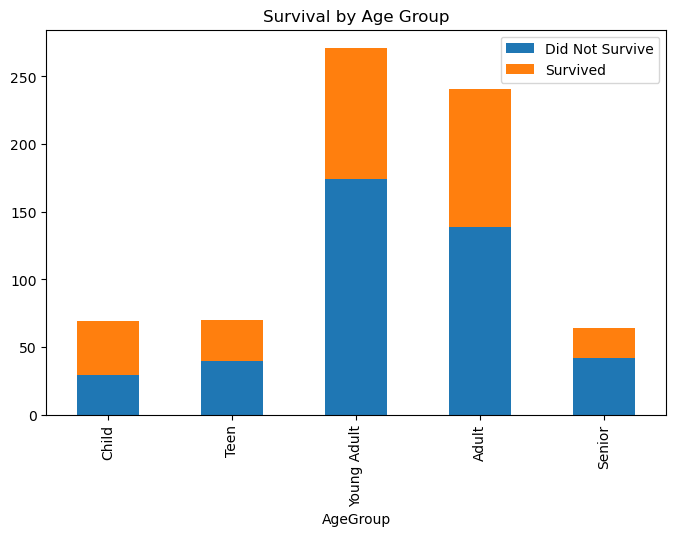

In [113]:
# Survival by Age Group
# Create copy of the dataframe excluding where 'Age' is missing
age_survival = df.dropna(subset=['Age']).copy()

# Define bins for age groups
# 0-12: Child, 13-18: Teen, 19-30: Young Adult, 31-50: Adult, 51-80: Senior
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create a new column 'AgeGroup' by categorizing 'Age' into the defined bins
# pd.cut assigns each age to the appropriate label
age_survival.loc[:,'AgeGroup'] = pd.cut(age_survival['Age'],bins=bins, labels=labels)

# Group data by 'AgeGroup' and 'Survived'
# Count number of passengers in each group
# Unstack converts 'Survived' vlaues into seperate columns
# fill_value = 0 replaces any missing counts with 0
age_group_counts = age_survival.groupby(['AgeGroup', 'Survived'], observed=False).size().unstack(fill_value=0)
# Rename column for clarity
age_group_counts.columns = ['Did Not Survive', 'Survived']

# Plot stacked bar chart
age_group_counts.plot.bar(stacked=True, # plot stacked bar chart
                          figsize=(8,5), # size of chart
                          title='Survival by Age Group') # chart title